In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [195]:
df = pd.read_csv("Dwellings_totalNZ-wide_format_updated_16-7-20.csv")

#only keep columns from json file and rename them from json file
heating_cols = json.load(open("mappings/name_mapping_heating.json"))
df = df[heating_cols.keys()]
df = df.rename(columns=heating_cols)
df = df[:29889]

/tmp/ipykernel_180800/624802745.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dwellings_totalNZ-wide_format_updated_16-7-20.csv")


In [196]:
df = df.replace("C", 0)
df = df.astype(int)
total = df.sum()
total_all = total.sum()


<Axes: title={'center': 'Number of dwellings with heating types'}, xlabel='index', ylabel='Number of dwellings'>

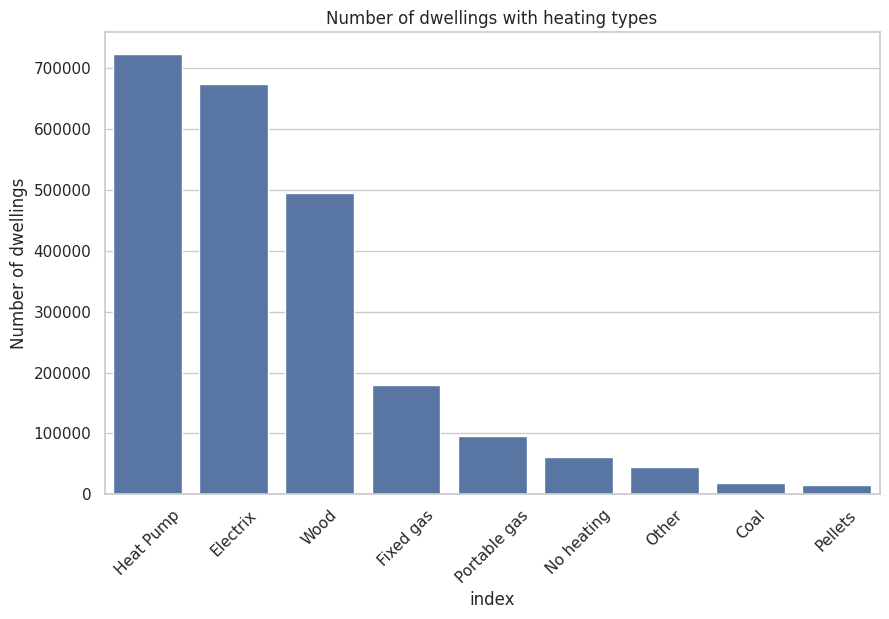

In [197]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title("Number of dwellings with heating types")
plt.ylabel("Number of dwellings")
#Make y axis labels in 100000
#Show y labels in millions
sns.barplot(data=df.sum().sort_values(ascending=False).reset_index(), x="index", y=0)
plt.savefig("heating_types_country.png")
#Add labels to the bars

In [198]:
df = pd.read_csv("Dwellings_totalNZ-wide_format_updated_16-7-20.csv")

#only keep columns from json file and rename them from json file
fuel_cols = json.load(open("mappings/name_mapping_fuel.json"))
df = df[fuel_cols.keys()]
df = df.rename(columns=fuel_cols)
df = df[:29889]
df = df.replace("C", 0)
#Make cols dtype int
df = df.astype(int)
df.head()

/tmp/ipykernel_180800/1188912834.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dwellings_totalNZ-wide_format_updated_16-7-20.csv")


,Electricity,Gas,Wood,Coal,Oil,Solar power,No fuel,Other
0,18,6,15,0,0,0,9,0
1,9,3,15,0,0,0,3,0
2,0,0,0,0,0,0,0,0
3,33,9,12,0,0,0,15,0
4,15,6,24,0,0,0,6,0


<Axes: title={'center': 'Number of dwellings with fuel types'}, xlabel='index', ylabel='Number of dwellings'>

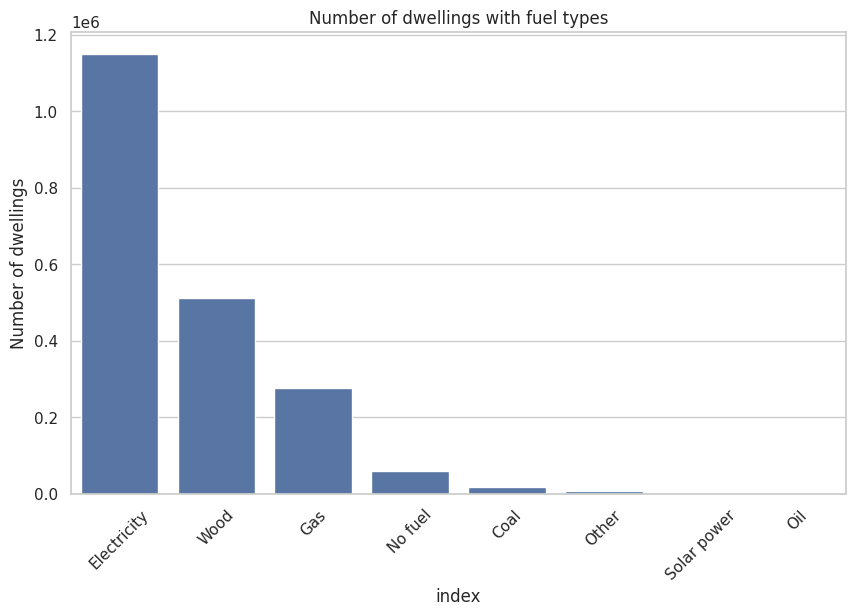

In [199]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
#rotate x-axis labels
plt.xticks(rotation=45)
#Title
plt.title("Number of dwellings with fuel types")
plt.ylabel("Number of dwellings")

#Add labels to the bars in percentage
total = df.sum()
total_all = total.sum()

sns.barplot(data=df.sum().sort_values(ascending=False).reset_index(), x="index", y=0)
plt.savefig("fuel_types_country.png")


## POPULATION

In [200]:
df_1 = pd.read_csv("data/population/Individual_part1_totalNZ-wide_format_updated_16-7-20.csv")
year_to_keep = "2018"

#Keep all column names containing 2018 and area code.
df_1 = df_1.filter(regex=f'{year_to_keep}|Area_code')

#Change all C values to -1
df_1 = df_1.replace('C', 0)
df_1 = df_1.replace('*', 0)





/tmp/ipykernel_180800/2130752254.py:1: DtypeWarning: Columns (1,2,300,312,324) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("data/population/Individual_part1_totalNZ-wide_format_updated_16-7-20.csv")


In [201]:
df_1.head()

,Area_code_and_description,Area_code,Census_2018_usually_resident_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,Census_2018_Unit_record_data_source_12_Individuals_on_the_household_listing_only_CURP,Census_2018_Unit_record_data_source_21_Admin_enumeration_CURP,Census_2018_Unit_record_data_source_Total_CURP,Census_2018_Sex_1_Male_CURP,Census_2018_Sex_2_Female_CURP,...,Census_2018_Languages_total_responses_66_None_eg_too_young_to_talk_CURP,Census_2018_Languages_total_responses_Total_stated_CURP,Census_2018_Languages_total_responses_99_Not_elsewhere_included_CURP,Census_2018_Languages_total_responses_Total_CURP,Census_2018_Maori_descent_01_Māori_descent_CURP,Census_2018_Maori_descent_02_No_Māori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP
0,SA1 7000000,7000000,141,138,114,6,21,141,75,66,...,0,141,0,141,135,6,3,141,0,141
1,SA1 7000001,7000001,114,120,87,3,24,114,60,54,...,3,114,0,114,96,18,0,114,0,114
2,SA1 7000002,7000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SA1 7000003,7000003,225,222,171,12,42,225,120,105,...,6,225,0,225,210,15,0,225,0,225
4,SA1 7000004,7000004,138,129,117,3,18,138,69,66,...,0,138,0,138,102,30,3,138,0,138


In [202]:
mapping = json.load(open("mappings/population_mapping.json"))
mapping_1 = mapping['1']
mapping_2 = mapping['2']
df_1 = df_1[mapping_1.keys()]
df_1 = df_1.rename(columns=mapping_1)
gisborne_pol = mapping["Gisborne_polygons"]
wellington_pol = mapping["Wellington_polygons"]
tot_pol = gisborne_pol + wellington_pol

df_1= df_1[df_1["Area_code"].isin(tot_pol)]
df_1.head()

,Area_code,Total,Male,Female,Under 15,15 to 29,30 to 64,65 and over,Median age male,Median age female,European,Māori,Pacific,Asian,"Middle Eastern, Latin American, African",Other,New Zealander,Māori descent,No Māori descent,Don't know Maori descent
30941,205200,1851,945,906,465,297,867,222,37.8,38,918,1188,54,12,6,24,21,1209,606,36
30943,205400,2946,1506,1440,615,441,1413,477,44.4,43.8,2517,642,45,57,6,54,51,774,2091,81
30944,205500,1371,588,783,135,123,387,726,59.9,70.3,1146,249,24,36,6,6,3,288,1062,21
30945,205600,969,504,465,171,159,459,180,44.6,44,717,369,36,33,9,12,12,408,537,24
30946,205700,1275,600,675,246,234,540,258,42.1,44.4,945,477,27,39,3,18,18,501,744,27


In [203]:

df_1_g= df_1[df_1["Area_code"].isin(gisborne_pol)]
df_1_w = df_1[df_1["Area_code"].isin(wellington_pol)]

In [204]:
df_1_g = df_1_g.astype(float)
df_1_w = df_1_w.astype(float)


In [205]:
#Cake plot for ethnicity
well_european = df_1_w["European"].sum()
well_maori = df_1_w["Māori"].sum()
well_asian = df_1_w["Asian"].sum()
well_pacific = df_1_w["Pacific"].sum()
well_other = df_1_w["Other"].sum() + df_1_w["New Zealander"].sum()

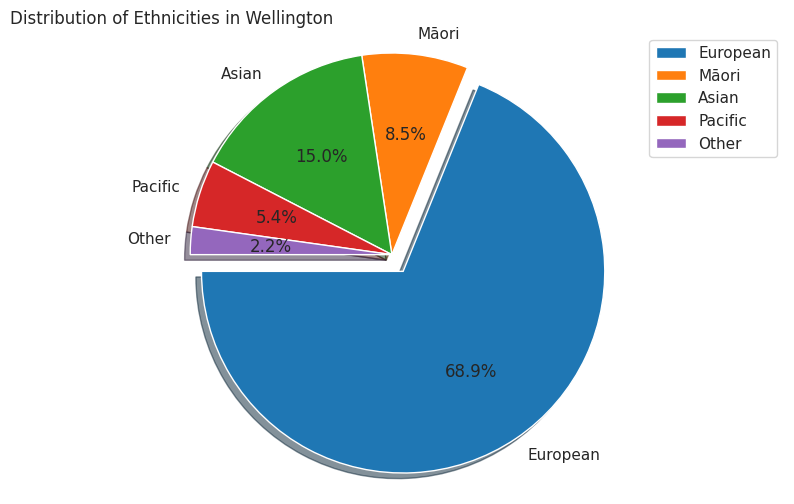

In [206]:
plt.figure(figsize=(10, 6))
plt.title("Distribution of Ethnicities in Wellington", loc="left")
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(
    [well_european, well_maori, well_asian, well_pacific, well_other],
    explode=explode,
    labels=["European", "Māori", "Asian", "Pacific", "Other",],
    autopct='%1.1f%%',
    startangle=180,
    colors=colors,
    shadow=True
)
plt.legend(loc="upper right")
plt.axis('equal')
plt.savefig("img/Distribution_of_Ethnics_wellington.png")
plt.show()


In [207]:
well_european = df_1_g["European"].sum()
well_maori = df_1_g["Māori"].sum()
well_asian = df_1_g["Asian"].sum()
well_pacific = df_1_g["Pacific"].sum()
well_other = df_1_g["Other"].sum() + df_1_g["New Zealander"].sum()

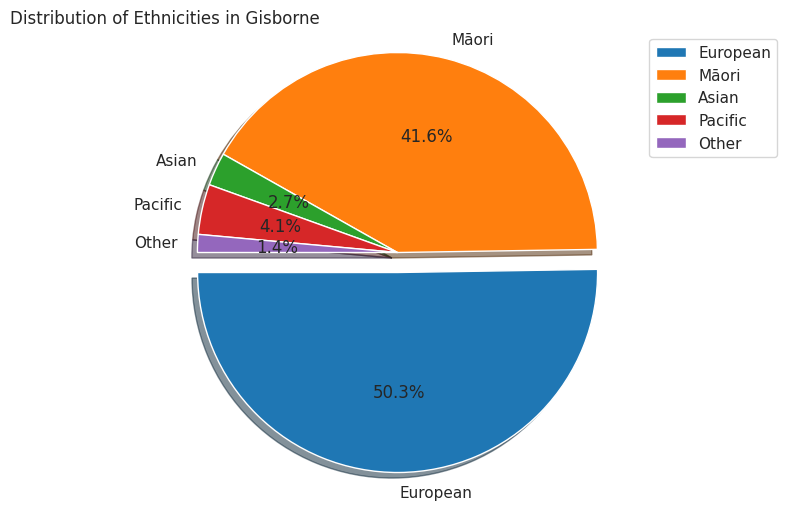

In [208]:
plt.figure(figsize=(10, 6))
plt.title("Distribution of Ethnicities in Gisborne", loc="left")
plt.pie(
    [well_european, well_maori, well_asian, well_pacific, well_other],
    explode=explode,
    labels=["European", "Māori", "Asian", "Pacific", "Other",],
    autopct='%1.1f%%',
    startangle=180,
    colors=colors,
    shadow=True
)
plt.legend(loc="upper right")
plt.axis('equal')
plt.savefig("img/Distribution_of_Ethnics_gisborne.png")
plt.show()

In [209]:
df_2 = pd.read_csv("data/population/Individual_part2_totalNZ-wide_format_updated_16-7-20.csv")
year_to_keep = "2018"

#Keep all column names containing 2018 and area code.
df_2 = df_2.filter(regex=f'{year_to_keep}|Area_code')

#Change all C values to -1
df_2 = df_2.replace('C', 0)
df_2 = df_2.replace('*', 0)

/tmp/ipykernel_180800/236779765.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv("data/population/Individual_part2_totalNZ-wide_format_updated_16-7-20.csv")


In [210]:
df_2 = df_2[mapping_2.keys()]
df_2 = df_2.rename(columns=mapping_2)
gisborne_pol = mapping["Gisborne_polygons"]
wellington_pol = mapping["Wellington_polygons"]
tot_pol = gisborne_pol + wellington_pol

df_2= df_2[df_2["Area_code"].isin(tot_pol)]
df_2.head()

,Area_code,Level 1 certificate,Level 2 certificate,Level 3 certificate,Level 4 certificate,Level 5 diploma,Level 6 Advanced diploma,Bachelor degree and Level 7 qualification,Post graduate and honours degrees,Masters degree,Doctorate degree,Total stated qualification,5000 or less,5001 to 10000,10001 to 20000,20001 to 30000,30001 to 50000,50001 to 70000,70001 or more,Total stated personal income
30941,205200,156,147,162,129,78,48,141,48,18,6,1272,189,63,270,228,279,177,180,1386
30943,205400,333,279,195,276,108,144,264,123,45,6,2220,240,96,333,312,483,372,492,2331
30944,205500,195,123,57,90,42,54,99,42,15,6,1146,84,42,324,318,192,123,156,1236
30945,205600,84,96,87,78,30,42,84,18,15,0,738,66,39,150,150,177,111,102,798
30946,205700,153,123,93,126,45,45,90,39,12,0,981,114,36,213,147,234,150,138,1032


In [211]:
df_2_g= df_2[df_2["Area_code"].isin(gisborne_pol)]
df_2_w = df_2[df_2["Area_code"].isin(wellington_pol)]
df_2_g = df_2_g.astype(float)
df_2_w = df_2_w.astype(float)

In [212]:
five_thousand = df_2_g["5000 or less"].sum()
five_thousand_10 = df_2_g["5001 to 10000"].sum()
ten_thousand_20 = df_2_g["10001 to 20000"].sum()
twenty_thousand_30 = df_2_g["20001 to 30000"].sum()
thirty_thousand = df_2_g["30001 to 50000"].sum()
fifty_thousand = df_2_g["50001 to 70000"].sum()
seventy_thousand_plus = df_2_g["70001 or more"].sum()

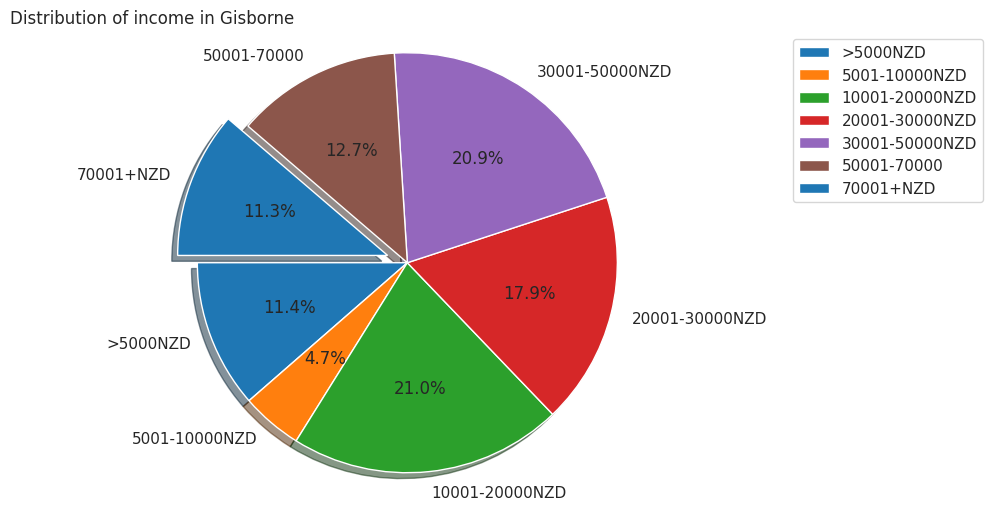

In [213]:
plt.figure(figsize=(10, 6))
plt.title("Distribution of income in Gisborne", loc="left")
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
explode = (0, 0, 0, 0, 0, 0, 0.1)
plt.pie(
    [five_thousand, five_thousand_10, ten_thousand_20, twenty_thousand_30, thirty_thousand, fifty_thousand, seventy_thousand_plus],
    explode=explode,
    labels=[">5000NZD", "5001-10000NZD", "10001-20000NZD", 
            "20001-30000NZD", "30001-50000NZD",
            "50001-70000","70001+NZD"],
    autopct='%1.1f%%',
    startangle=180,
    colors=colors,
    shadow=True
)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.savefig("img/income_gisborne.png")
plt.show()

In [214]:

five_thousand = df_2_w["5000 or less"].sum()
five_thousand_10 = df_2_w["5001 to 10000"].sum()
ten_thousand_20 = df_2_w["10001 to 20000"].sum()
twenty_thousand_30 = df_2_w["20001 to 30000"].sum()
thirty_thousand = df_2_w["30001 to 50000"].sum()
fifty_thousand = df_2_w["50001 to 70000"].sum()
seventy_thousand_plus = df_2_w["70001 or more"].sum()

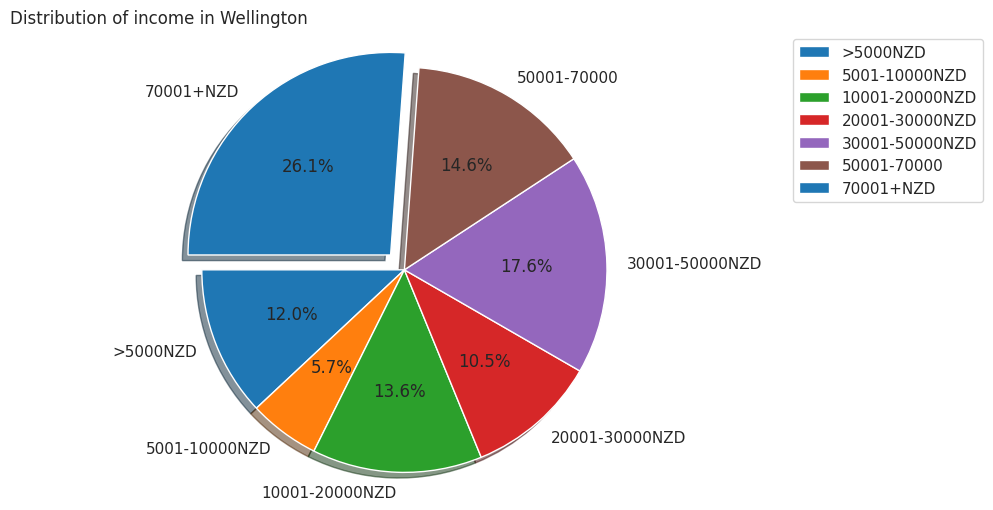

In [215]:
plt.figure(figsize=(10, 6))
plt.title("Distribution of income in Wellington", loc="left")
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
explode = (0, 0, 0, 0, 0, 0, 0.1)
plt.pie(
    [five_thousand, five_thousand_10, ten_thousand_20, twenty_thousand_30, thirty_thousand, fifty_thousand, seventy_thousand_plus],
    explode=explode,
    labels=[">5000NZD", "5001-10000NZD", "10001-20000NZD", 
            "20001-30000NZD", "30001-50000NZD",
            "50001-70000","70001+NZD"],
    autopct='%1.1f%%',
    startangle=180,
    colors=colors,
    shadow=True
)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.axis('equal')

plt.savefig("img/income_wellington.png")
plt.show()

